<a target="_blank" href="https://colab.research.google.com/github/iam-dante/Open-Baltimore-Analysis/blob/main/Analysis/Open_Baltimore.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
d1 = pd.read_csv("https://raw.githubusercontent.com/iam-dante/Open-Baltimore-Analysis/main/Dataset/D1.csv")
d2 = pd.read_csv("https://raw.githubusercontent.com/iam-dante/Open-Baltimore-Analysis/main/Dataset/D2.csv")
d3 = pd.read_csv("https://raw.githubusercontent.com/iam-dante/Open-Baltimore-Analysis/main/Dataset/D3.csv")

df = pd.concat([d1,d2,d3])
df.shape

/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_4240/383703369.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv("https://raw.githubusercontent.com/iam-dante/Open-Baltimore-Analysis/main/Dataset/D1.csv")
/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_4240/383703369.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  d3 = pd.read_csv("https://raw.githubusercontent.com/iam-dante/Open-Baltimore-Analysis/main/Dataset/D3.csv")


(587673, 23)

In [10]:
# Get a full picture of the columns

df.columns

Index(['X', 'Y', 'RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents'],
      dtype='object')

In [11]:
# Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587673 entries, 0 to 195890
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                586689 non-null  float64
 1   Y                586689 non-null  float64
 2   RowID            587673 non-null  int64  
 3   CCNumber         587673 non-null  object 
 4   CrimeDateTime    587673 non-null  object 
 5   CrimeCode        587673 non-null  object 
 6   Description      587673 non-null  object 
 7   Inside_Outside   536412 non-null  object 
 8   Weapon           145090 non-null  object 
 9   Post             579693 non-null  object 
 10  Gender           493050 non-null  object 
 11  Age              473013 non-null  float64
 12  Race             567987 non-null  object 
 13  Ethnicity        61611 non-null   object 
 14  Location         584616 non-null  object 
 15  Old_District     563488 non-null  object 
 16  New_District     16201 non-null   object 
 

In [12]:
# View the data to understand the important columns

df.head(10)

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,...,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.584281,39.282869,1,12A01562,2011/12/30 09:37:00+00,6E,LARCENY,I,NaN,214,...,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
1,-76.570626,39.367758,2,11L12669,2011/12/30 00:36:00+00,3JF,ROBBERY,I,FIREARM,423,...,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2,-76.562701,39.323386,3,11L13076,2011/12/30 21:00:00+00,3AO,ROBBERY,O,OTHER,432,...,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
3,-76.602909,39.232993,4,12A00628,2011/12/30 09:00:00+00,5A,BURGLARY,I,NaN,913,...,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
4,-76.576114,39.292284,5,11L13140,2011/12/30 00:13:00+00,4C,AGG. ASSAULT,O,OTHER,222,...,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1
5,-76.599017,39.307359,6,11L13071,2011/12/30 22:11:00+00,4A,AGG. ASSAULT,O,FIREARM,314,...,NaN,1500 N SPRING ST,EASTERN,NaN,OLIVER,39.307359,-76.599017,"(39.307359,-76.599017)",STREET,1
6,-76.612324,39.356221,7,11L12667,2011/12/30 00:22:00+00,5B,BURGLARY,I,NaN,523,...,NaN,300 BROADMOOR RD,NORTHERN,NaN,HOMELAND,39.356221,-76.612324,"(39.356221,-76.612324)",GARAGE ON PRIV. PROP,1
7,-76.576827,39.292260,8,11L12921,2011/12/30 15:30:00+00,6D,LARCENY FROM AUTO,O,NaN,222,...,NaN,0 N STREEPER ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292260,-76.576827,"(39.29226,-76.576827)",STREET,1
8,-76.701945,39.292511,9,11L12823,2011/12/30 11:50:00+00,4D,AGG. ASSAULT,I,HANDS,823,...,NaN,600 COOKS LN,SOUTHWEST,NaN,WEST HILLS,39.292511,-76.701945,"(39.292511,-76.701945)",APT/CONDO - OCCUPIED,1
9,-76.570129,39.321580,10,11L12818,2011/12/30 12:20:00+00,4E,COMMON ASSAULT,I,NaN,432,...,NaN,3200 LAKE AVE,NORTHEAST,NaN,BELAIR-EDISON,39.321580,-76.570129,"(39.32158,-76.570129)",ROW/TOWNHOUSE-OCC,1


In [13]:
# Find the unique value but first turn them into lowercase and trim the unexpected spaces

Total_Unique_Neighborhood = len(df["Neighborhood"].sort_values().str.lower().str.strip().unique())

print("The total number of Unique Neighorbood in the dataset", Total_Unique_Neighborhood)


The total number of Unique Neighorbood in the dataset 279


In [14]:
# Drop the columns that wont be used

df_center = df.drop(['X', 'Y', 'RowID', 'CCNumber',  'CrimeCode',
       'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
      ], axis=1)

In [15]:
# New column names
new_column_names = {"Description": "Crimes", "CrimeDateTime": "Years", "Neighborhood": "Neighborhood", "Total_Incidents": "Total Incidents"}

# Create Neighborhood Data in a same order
df_center["Neighborhood"] = df_center["Neighborhood"].str.capitalize()

# Create Description Data in a same order
df_center["Description"] = df_center["Description"].str.capitalize()

# Get one the year in the crimedatetime column
df_center['CrimeDateTime'] = df_center['CrimeDateTime'].apply(lambda x: x[:4])

# Rename the columns names
data = df_center.rename(columns = new_column_names)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587673 entries, 0 to 195890
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Years            587673 non-null  object
 1   Crimes           587673 non-null  object
 2   Neighborhood     579522 non-null  object
 3   Total Incidents  587673 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 22.4+ MB


In [17]:
# Drop all rows in Years that arent between 2017-2022
data = data[data["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in Crimes that arent [Murder, Shooting, Agg.Assualts]
data = data[data["Crimes"].isin(["Homicide", "Shooting", "Agg. assault"])]

data = data.reset_index(drop=True)

In [18]:
data["Years"].value_counts()

Years
2022    7144
2017    6909
2019    6849
2021    6725
2018    6617
2020    6403
Name: count, dtype: int64

In [19]:
#The crime that will be considered

data['Crimes'].unique()

array(['Agg. assault', 'Shooting', 'Homicide'], dtype=object)

In [20]:
# Group the data By Year and Neighborhood b summing the Total incidents of above crimes

groupData = data.groupby(by=["Years", "Neighborhood"]).sum().agg(list).reset_index()

In [21]:
groupData.head()

,Years,Neighborhood,Crimes,Total Incidents
0,2017,Abell,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,12
1,2017,Allendale,Agg. assaultHomicideAgg. assaultAgg. assaultAg...,48
2,2017,Arcadia,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6
3,2017,Arlington,Agg. assaultAgg. assaultAgg. assaultShootingAg...,57
4,2017,Armistead gardens,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,25


In [22]:
neighborhood = groupData["Neighborhood"].unique()

data_2017 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2017") & (groupData["Neighborhood"] == i)]["Total Incidents"].values

   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2017.append(0)

   else:
      data_2017.append(value[0])


data_2018 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2018") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2018.append(0)

   else:
      data_2018.append(value[0])

data_2019 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2019") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2019.append(0)

   else:
      data_2019.append(value[0])

data_2020 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2020") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2020.append(0)

   else:
      data_2020.append(value[0])


data_2021 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2021") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2021.append(0)

   else:
      data_2021.append(value[0])
      
data_2022 = []
for i in neighborhood:
   values = groupData[(groupData["Years"] == "2022") & (groupData["Neighborhood"] == i)]["Total Incidents"].values
   value = [item[0] if isinstance(item, np.ndarray) and item.size == 1 else item for item in values]

   if len(value) == 0:

      data_2022.append(0)

   else:
      data_2022.append(value[0])


In [23]:
# Create a two dimensino array that represents all incidents from 2017-2022

two_dimension_data = np.vstack([data_2017, data_2018, data_2019,data_2020,data_2021, data_2022])

data_shape  = two_dimension_data.shape

print(f"The shape of the data is {data_shape} that represents 6 years and 273 neighbors")

The shape of the data is (6, 273) that represents 6 years and 273 neighbors


In [24]:
two_dimension_data

array([[12, 48,  6, ...,  0,  0,  0],
       [13, 56,  9, ...,  0,  0,  0],
       [10, 48,  7, ...,  2,  0,  0],
       [ 7, 24, 10, ...,  0,  1,  0],
       [ 8, 48,  6, ...,  0,  0,  1],
       [13, 35,  5, ...,  0,  0,  0]])

# Increasing Neighborhoods

In [25]:
results = []
def change_rate(tdarray):


    for i in range(273):

        arr = tdarray[:, i]

        if (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]) and (arr[4] > arr[3]) and (arr[5] > arr[4]):

            results.append(6)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]) and (arr[4] > arr[3]):

            results.append(5)

        elif (arr[1] > arr[0]) and (arr[2] > arr[1]) and (arr[3] > arr[2]):

            results.append(4)
            
        elif (arr[1] > arr[0]) and (arr[2] > arr[1]):

            results.append(3)
        
        else:
            results.append(0)


change_rate(two_dimension_data)

In [26]:
def find_all_indices(arr, target):
    indices = [i for i, value in enumerate(arr) if value == target]
    return indices



indices_for_five = find_all_indices(results, 5)

indices_for_four = find_all_indices(results, 4)


In [27]:
# Extract the increasing neighborhoods

increasing_neighborhood = neighborhood[[90,193, 68,83, 118]]

print("The increasing neighborhood are: ", increasing_neighborhood)


The increasing neighborhood are:  ['Glen oaks' 'Pulaski industrial area' 'Edgewood' 'Frankford' 'Irvington']


In [28]:
# Dataframe for increaseing neighbourhoods

df_increasing_neighborhood = groupData[groupData["Neighborhood"].isin(increasing_neighborhood)].reset_index()

df_increasing_neighborhood

,index,Years,Neighborhood,Crimes,Total Incidents
0,68,2017,Edgewood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,32
1,83,2017,Frankford,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,121
2,90,2017,Glen oaks,HomicideAgg. assaultAgg. assaultAgg. assaultAg...,14
3,118,2017,Irvington,ShootingAgg. assaultHomicideHomicideAgg. assau...,51
4,193,2017,Pulaski industrial area,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,23
5,322,2018,Edgewood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,34
6,336,2018,Frankford,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,147
7,343,2018,Glen oaks,Agg. assaultAgg. assaultHomicideAgg. assaultAg...,15
8,372,2018,Irvington,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,56
9,449,2018,Pulaski industrial area,Agg. assaultAgg. assaultAgg. assaultShootingAg...,24


<Axes: title={'center': 'Pulaski Industrial Area Graph'}, xlabel='Years'>

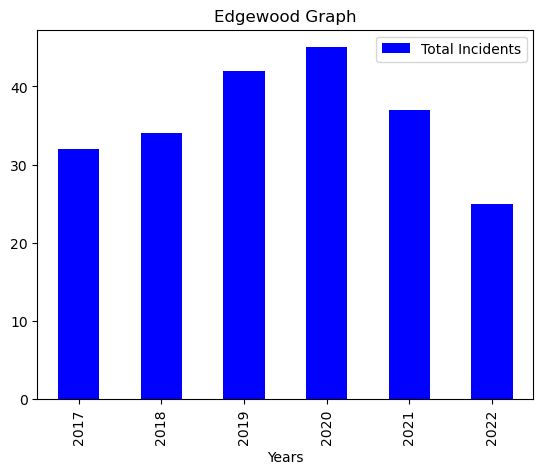

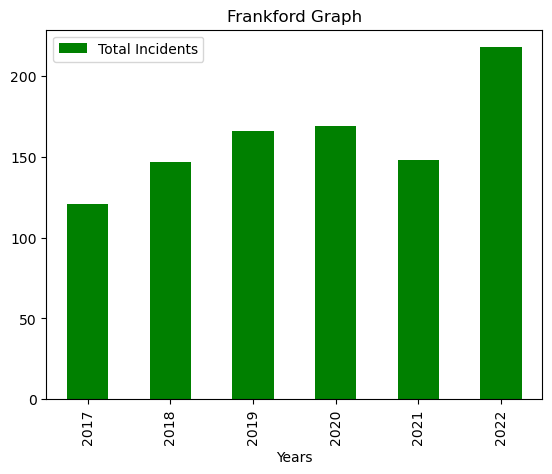

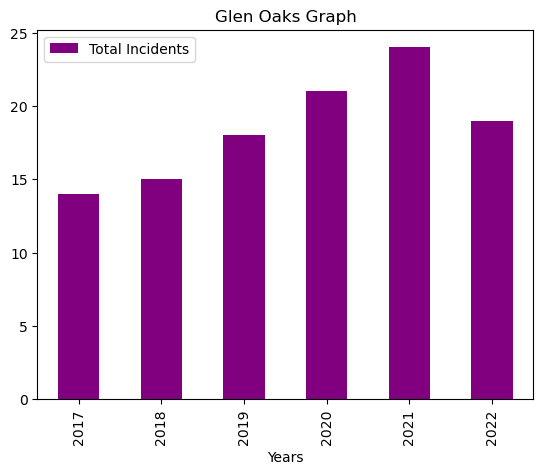

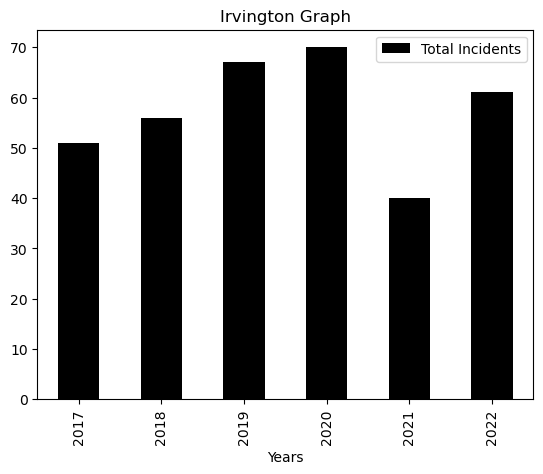

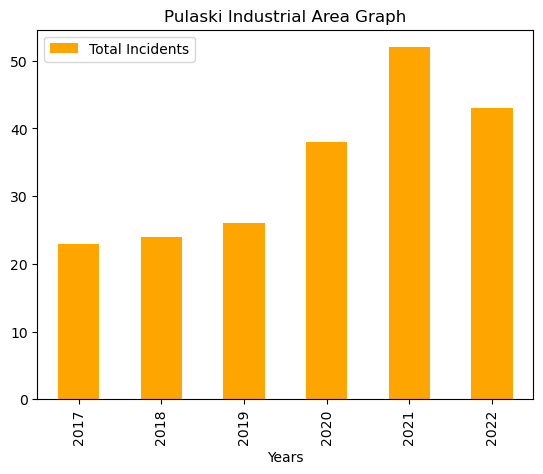

In [29]:
# Create a dataframe for every increasing neighborhood

df_edgewood = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Edgewood"]

df_frankford = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Frankford"]

df_glenoaks = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Glen oaks"]

df_irvington = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Irvington"]

df_pulaskiindustrialarea = df_increasing_neighborhood[ df_increasing_neighborhood["Neighborhood"] == "Pulaski industrial area"]


# Plot all the graph of the neighborhood

df_edgewood.plot(x="Years", y="Total Incidents", kind='bar', title="Edgewood Graph", color="blue")

df_frankford.plot(x="Years", y="Total Incidents",kind='bar', title="Frankford Graph", color="green")

df_glenoaks.plot(x="Years", y="Total Incidents",kind='bar', title="Glen Oaks Graph", color="purple")

df_irvington.plot(x="Years", y="Total Incidents",kind='bar', title="Irvington Graph", color="black")

df_pulaskiindustrialarea.plot(x="Years", y="Total Incidents",kind='bar', title="Pulaski Industrial Area Graph", color="Orange")



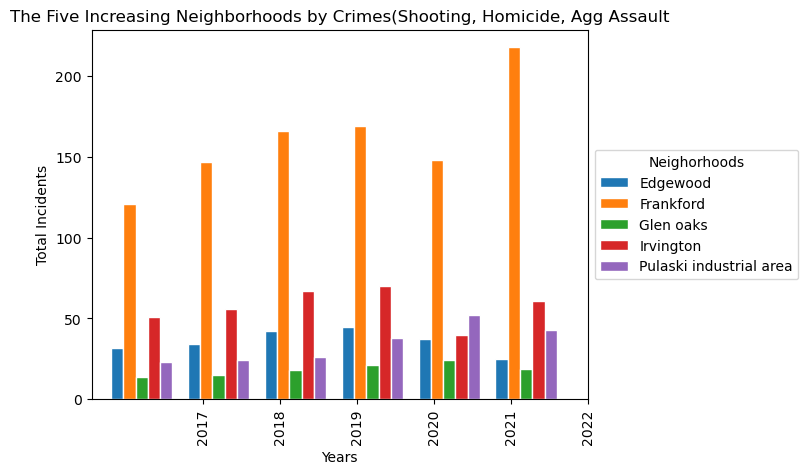

In [30]:
pivot_increasing_neighborhood = df_increasing_neighborhood.pivot(index='Years', columns='Neighborhood', values='Total Incidents')

pivot_increasing_neighborhood.plot(kind='bar', width=0.8, position=1.5, edgecolor='white')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Total Incidents')
plt.title('The Five Increasing Neighborhoods by Crimes(Shooting, Homicide, Agg Assault')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Neighorhoods', fontsize=10)

# Show the plot
plt.show()

In [31]:
pivot_increasing_neighborhood

Neighborhood,Edgewood,Frankford,Glen oaks,Irvington,Pulaski industrial area
Years,,,,,
2017,32,121,14,51,23
2018,34,147,15,56,24
2019,42,166,18,67,26
2020,45,169,21,70,38
2021,37,148,24,40,52
2022,25,218,19,61,43


# Decreasing Neighborhood

In [32]:
decreasing_results = []

def decreasing_fuction(tdarray):


    for i in range(273):

        arr = tdarray[:, i]

        if (arr[1] < arr[0]) and (arr[2] < arr[1]) and (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

           decreasing_results.append(6)

        elif (arr[2] < arr[1]) and (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

            decreasing_results.append(5)

        elif (arr[3] < arr[2]) and (arr[4] < arr[3]) and (arr[5] < arr[4]):

            decreasing_results.append(4)
            
        elif (arr[4] < arr[3]) and (arr[5] < arr[4]):


            decreasing_results.append(3)
        
        elif (arr[5] < arr[4]):

            decreasing_results.append(3)
        
        else:
            decreasing_results.append(0)


decreasing_fuction(two_dimension_data)

In [33]:
indices_for_five_d = find_all_indices(decreasing_results, 5)

indices_for_four_d = find_all_indices(decreasing_results, 4)

indices_for_five_d, indices_for_four_d


([21, 66], [34, 123, 145, 153, 188, 195, 210])

In [34]:
# Extract the decreasing neighborhoods

decreasing_neighborhood = neighborhood[[21,66,34,123,145]]

print("The increasing neighborhood are: ", decreasing_neighborhood)

The increasing neighborhood are:  ['Bridgeview/greenlawn' 'Easterwood' 'Carroll-south hilton' 'Kresson'
 'Middle branch/reedbird parks']


In [35]:
# Dataframe for increaseing neighbourhoods

df_decreasing_neighborhood = groupData[groupData["Neighborhood"].isin(decreasing_neighborhood)].reset_index()

df_decreasing_neighborhood

,index,Years,Neighborhood,Crimes,Total Incidents
0,21,2017,Bridgeview/greenlawn,Agg. assaultAgg. assaultShootingAgg. assaultAg...,32
1,34,2017,Carroll-south hilton,Agg. assaultAgg. assaultAgg. assaultHomicideHo...,13
2,66,2017,Easterwood,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,18
3,123,2017,Kresson,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,16
4,145,2017,Middle branch/reedbird parks,Agg. assaultAgg. assaultAgg. assaultShootingAg...,13
5,276,2018,Bridgeview/greenlawn,Agg. assaultShootingAgg. assaultAgg. assaultAg...,34
6,289,2018,Carroll-south hilton,HomicideAgg. assaultAgg. assaultAgg. assaultAg...,24
7,320,2018,Easterwood,Agg. assaultAgg. assaultAgg. assaultShootingAg...,24
8,379,2018,Kresson,Agg. assaultShootingAgg. assaultAgg. assaultAg...,8
9,399,2018,Middle branch/reedbird parks,HomicideAgg. assaultShootingAgg. assaultAgg. a...,19


<Axes: title={'center': 'Middle branch/reedbird parks Graph'}, xlabel='Years'>

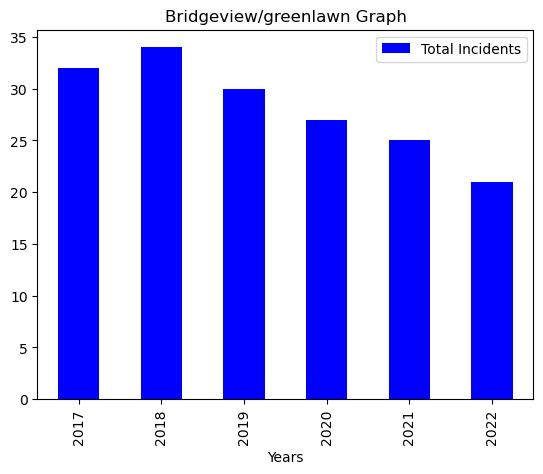

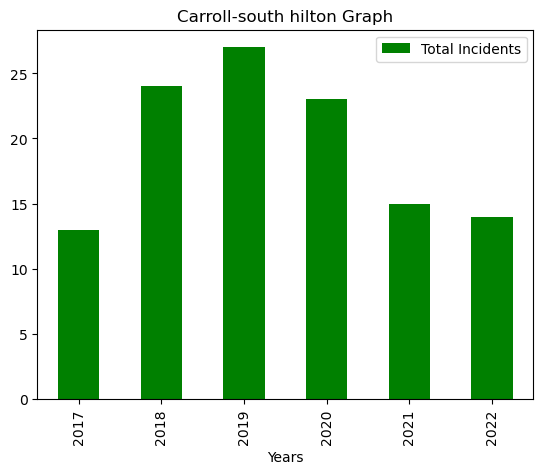

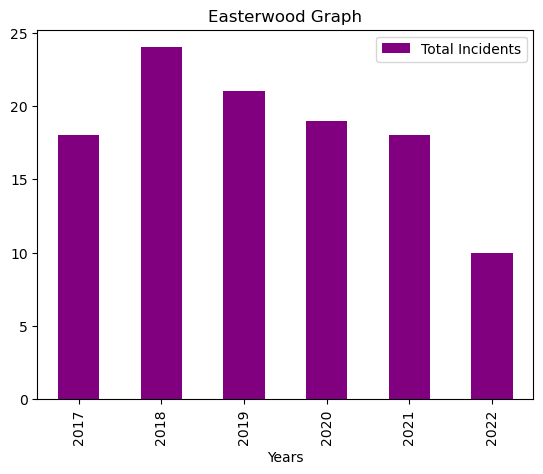

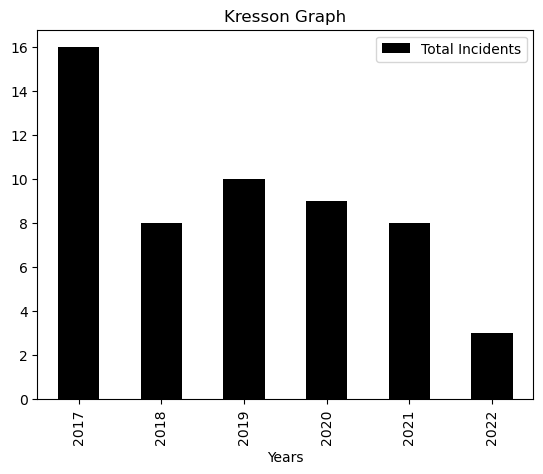

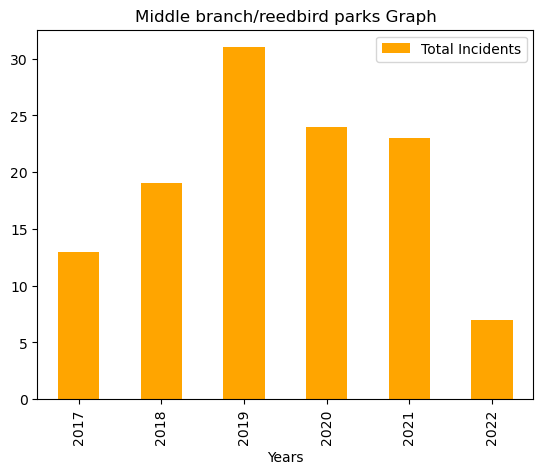

In [36]:
# Create a dataframe for every increasing neighborhood

df_bridgeviewgreenlawn = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Bridgeview/greenlawn"]

df_carrollsouthhilton = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Carroll-south hilton"]

df_easterwood = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Easterwood"]

df_kresson = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Kresson"]

df_middlebranchreedbirdparks = df_decreasing_neighborhood[ df_decreasing_neighborhood["Neighborhood"] == "Middle branch/reedbird parks"]


# Plot all the graph of the neighborhood

df_bridgeviewgreenlawn.plot(x="Years", y="Total Incidents", kind='bar', title="Bridgeview/greenlawn Graph", color="blue")

df_carrollsouthhilton.plot(x="Years", y="Total Incidents",kind='bar', title="Carroll-south hilton Graph", color="green")

df_easterwood.plot(x="Years", y="Total Incidents",kind='bar', title="Easterwood Graph", color="purple")

df_kresson.plot(x="Years", y="Total Incidents",kind='bar', title="Kresson Graph", color="black")

df_middlebranchreedbirdparks.plot(x="Years", y="Total Incidents",kind='bar', title="Middle branch/reedbird parks Graph", color="Orange")



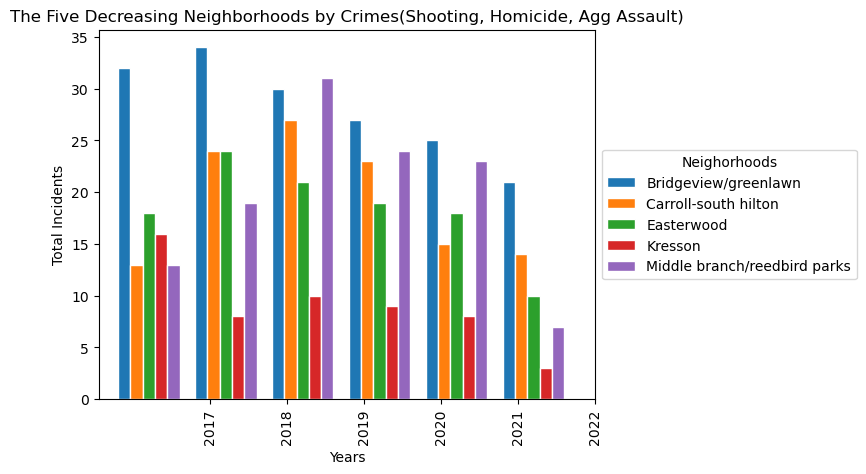

In [37]:
pivot_decreasing_neighborhood = df_decreasing_neighborhood.pivot(index='Years', columns='Neighborhood', values='Total Incidents')

pivot_decreasing_neighborhood.plot(kind='bar', width=0.8, position=1.5, edgecolor='white')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Total Incidents')
plt.title('The Five Decreasing Neighborhoods by Crimes(Shooting, Homicide, Agg Assault)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Neighorhoods', fontsize=10)

# Show the plot
plt.show()



In [38]:
pivot_decreasing_neighborhood

Neighborhood,Bridgeview/greenlawn,Carroll-south hilton,Easterwood,Kresson,Middle branch/reedbird parks
Years,,,,,
2017,32,13,18,16,13
2018,34,24,24,8,19
2019,30,27,21,10,31
2020,27,23,19,9,24
2021,25,15,18,8,23
2022,21,14,10,3,7


# Overview Findings

In [39]:
# Group the data by years

data_group_year = groupData.groupby("Years").sum().agg(list).reset_index()

In [40]:
data_group_year

,Years,Neighborhood,Crimes,Total Incidents
0,2017,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6800
1,2018,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6525
2,2019,AbellAllendaleArcadiaArlingtonArmistead garden...,ShootingAgg. assaultAgg. assaultAgg. assaultAg...,6740
3,2020,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6311
4,2021,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,6676
5,2022,AbellAllendaleArcadiaArlingtonArmistead garden...,Agg. assaultAgg. assaultAgg. assaultAgg. assau...,7132


In [41]:
total_incident_2017 = data_group_year[data_group_year["Years"] == "2017"]["Total Incidents"].values[0]
total_incident_2022 = data_group_year[data_group_year["Years"] == "2022"]["Total Incidents"].values[0]

In [42]:
# Differents of Incidents from 2017 - 2022 

difference_2017_2022 = total_incident_2022 - total_incident_2017

print("The difference between 2022 and 2017 in crimes (Shooting, Agg. Assalt and Homicide)  for all neighborhood is: ", difference_2017_2022 )

The difference between 2022 and 2017 in crimes (Shooting, Agg. Assalt and Homicide)  for all neighborhood is:  332


In [43]:
# Percentange change from 2017 to 2022

percentange_change = round(((total_incident_2022 - total_incident_2017) / (total_incident_2017)) * 100, 2)

print("The percentange change from 2017 to 2020 from crimes(Shooting, Agg. Assalt and Homicide) for all neighborhood is: ", percentange_change,"%")

The percentange change from 2017 to 2020 from crimes(Shooting, Agg. Assalt and Homicide) for all neighborhood is:  4.88 %
